# Stock prediction and Portfolio Optimization 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### ETL

Stocks

In [3]:
tickers = ['BHP','CSL','RIO','CBA','WOW','WES','TLS','AMC','BXB','FPH']

In [4]:
stocks = pd.read_csv('ASX200top10.csv')
stocks.head(5)

,BHP.PX,CSL.PX,RIO.PX,CBA.PX,WOW.PX,WES.PX,TLS.PX,AMC.PX,BXB.PX,FPH.PX
0,28.1285,91.60,55.85,92.7032,29.48,31.2886,6.29,14.06,11.50,6.40
1,28.9976,92.12,57.23,93.0019,29.49,31.6049,6.31,14.04,11.52,6.44
2,28.3528,92.63,56.41,92.9223,29.20,31.3101,6.33,14.02,11.48,6.38
3,28.2406,93.32,55.78,93.9977,28.99,31.2814,6.32,14.18,11.54,6.43
4,28.2406,93.32,55.78,93.9977,28.99,31.2814,6.32,14.18,11.54,6.43


In [5]:
stocks.shape

(1309, 10)

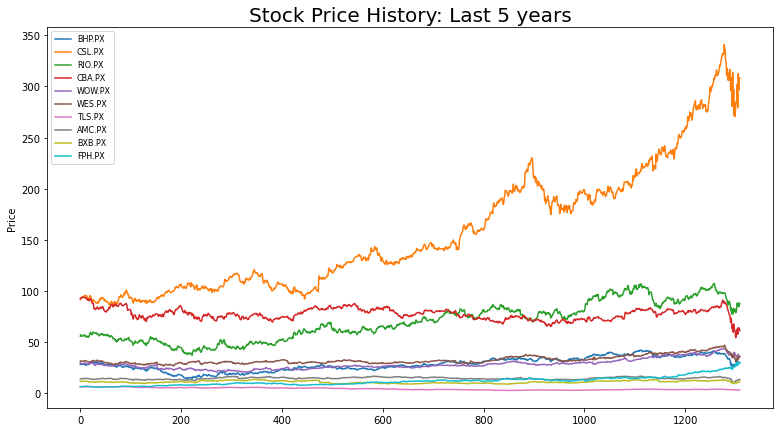

In [6]:
# Stock Price: Top 10 

plt.figure(figsize=(13,7))

for c in stocks.columns.values:
      plt.plot(stocks[c],label=c)

plt.title('Stock Price History: Last 5 years', fontsize=20)

plt.ylabel('Price',fontsize=10)
plt.legend(stocks.columns.values,loc='upper left', fontsize=8)

plt.show()

Bloomberg Stock data

In [7]:
b_data = pd.read_excel('Bloomberg.xlsx')
b_data.head()

,Unnamed: 0,AS51 Index,Unnamed: 2,BHP AT Equity,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,CSL AT Equity,Unnamed: 9,...,BXB AT Equity,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,FPH AT Equity,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52
0,Dates,DAY_TO_DAY_TOT_RETURN_GROSS_DVDS,PX_LAST,DAY_TO_DAY_TOT_RETURN_GROSS_DVDS,PX_LAST,EQY_WEIGHTED_AVG_PX,PX_VOLUME,CUR_MKT_CAP,DAY_TO_DAY_TOT_RETURN_GROSS_DVDS,PX_LAST,...,DAY_TO_DAY_TOT_RETURN_GROSS_DVDS,PX_LAST,EQY_WEIGHTED_AVG_PX,PX_VOLUME,CUR_MKT_CAP,DAY_TO_DAY_TOT_RETURN_GROSS_DVDS,PX_LAST,EQY_WEIGHTED_AVG_PX,PX_VOLUME,CUR_MKT_CAP
1,2015-03-30 00:00:00,-1.2458,5846.09,-2.1138,28.1285,28.1708,5488439,158495.368,-0.2722,91.6,...,-0.3466,11.5,11.4671,3099998,18012.4899,0.6289,6.4,6.3552,229815,3570.8176
2,2015-03-31 00:00:00,0.7807,5891.505,3.0897,28.9976,28.9474,7356402,160263.7051,0.5677,92.12,...,0.1739,11.52,11.5431,5205510,18050.2931,0.625,6.44,6.4435,122052,3593.1352
3,2015-04-01 00:00:00,-0.5171,5860.753,-2.2237,28.3528,28.417,8779128,157870.4531,0.5536,92.63,...,-0.3472,11.48,11.5003,3061894,17987.6185,-0.9317,6.38,6.3896,134891,3559.6588
4,2015-04-02 00:00:00,0.6455,5898.582,-0.3955,28.2406,28.2239,7231402,156288.6287,0.7449,93.32,...,0.5226,11.54,11.5606,2719521,18081.6304,0.7837,6.43,6.3886,225207,3587.5558


In [8]:
# some data preprocessing
column_names = b_data.loc[0,:].values[3:8]
b_data = b_data.drop(b_data.index[0]) 
b_data.rename(columns = {'Unnamed: 0':'Date'}, inplace=True) 
b_data['Date'] = pd.to_datetime(b_data['Date'])
b_data['Date'] = b_data['Date'].dt.strftime('%d/%m/%Y')
dates = b_data['Date']
b_data =  b_data.reset_index()
del b_data['index']
b_data.head()

,Date,AS51 Index,Unnamed: 2,BHP AT Equity,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,CSL AT Equity,Unnamed: 9,...,BXB AT Equity,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,FPH AT Equity,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52
0,30/03/2015,-1.2458,5846.09,-2.1138,28.1285,28.1708,5488439,158495.368,-0.2722,91.6,...,-0.3466,11.5,11.4671,3099998,18012.4899,0.6289,6.4,6.3552,229815,3570.8176
1,31/03/2015,0.7807,5891.505,3.0897,28.9976,28.9474,7356402,160263.7051,0.5677,92.12,...,0.1739,11.52,11.5431,5205510,18050.2931,0.625,6.44,6.4435,122052,3593.1352
2,01/04/2015,-0.5171,5860.753,-2.2237,28.3528,28.417,8779128,157870.4531,0.5536,92.63,...,-0.3472,11.48,11.5003,3061894,17987.6185,-0.9317,6.38,6.3896,134891,3559.6588
3,02/04/2015,0.6455,5898.582,-0.3955,28.2406,28.2239,7231402,156288.6287,0.7449,93.32,...,0.5226,11.54,11.5606,2719521,18081.6304,0.7837,6.43,6.3886,225207,3587.5558
4,03/04/2015,0.6455,5898.582,-0.3955,28.2406,28.2239,7231402,156288.6287,0.7449,93.32,...,0.5226,11.54,11.5606,2719521,18081.6304,0.7837,6.43,6.3886,225207,3587.5558


In [9]:
data_names = ['BHP_data','CSL_data','RIO_data','CBA_data','WOW_data','WES_data','TLS_data','AMC_data','BXB_data', 'FPH_data']

# AS51 Index data
AS51_data = b_data.loc[: , 'AS51 Index':'Unnamed: 2']
AS51_data.columns = column_names[0:2]

# Data for other tickers
datalist = []
n = 7
for t,d in zip(tickers,data_names):
    start_column = f'{t} AT Equity' 
    end_column = f'Unnamed: {n}'
    x = b_data.loc[:, start_column:end_column]
    x.columns = column_names
    n += 5
    datalist.append(x)

# Feature data for comparisons
CSL_data = datalist[1]
TLS_data = datalist[6]

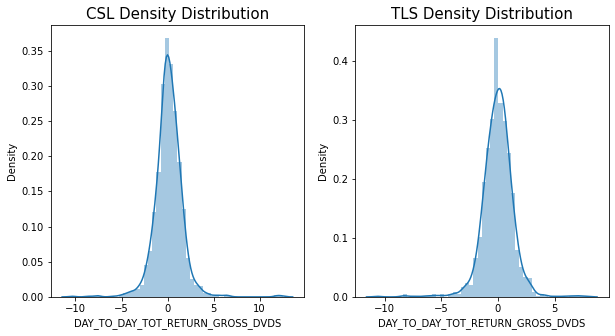

In [10]:
# DAY TO_DAY_TOT_RETURN_GROSS_DVDS: Density distribution 

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.distplot(CSL_data['DAY_TO_DAY_TOT_RETURN_GROSS_DVDS'])
plt.title('CSL Density Distribution', fontsize=15)

plt.subplot(1,2,2)
sns.distplot(TLS_data['DAY_TO_DAY_TOT_RETURN_GROSS_DVDS'])
plt.title('TLS Density Distribution', fontsize=15)

plt.show()

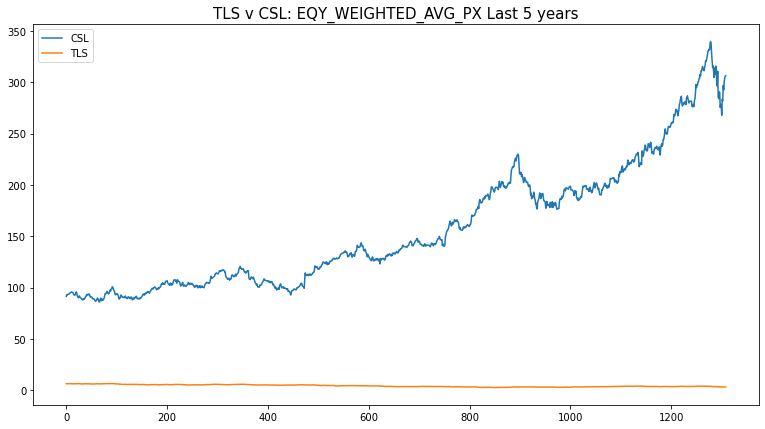

In [11]:
# EQY_WEIGHTED_AVG_PX: Line graphs

plt.figure(figsize=(13,7))

plt.title('TLS v CSL: EQY_WEIGHTED_AVG_PX Last 5 years', fontsize=15)

plt.plot(CSL_data['EQY_WEIGHTED_AVG_PX'])
plt.plot(TLS_data['EQY_WEIGHTED_AVG_PX'])
plt.legend(['CSL','TLS'],loc='best', fontsize=10)

plt.show()

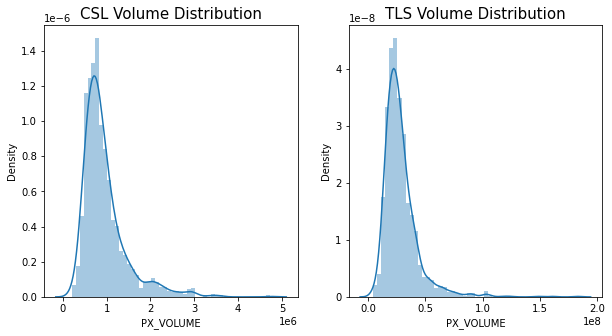

In [12]:
# PX_VOLUME: Density distribution 

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.distplot(CSL_data['PX_VOLUME'])
plt.title('CSL Volume Distribution', fontsize=15)

plt.subplot(1,2,2)
sns.distplot(TLS_data['PX_VOLUME'])
plt.title('TLS Volume Distribution', fontsize=15)

plt.show()

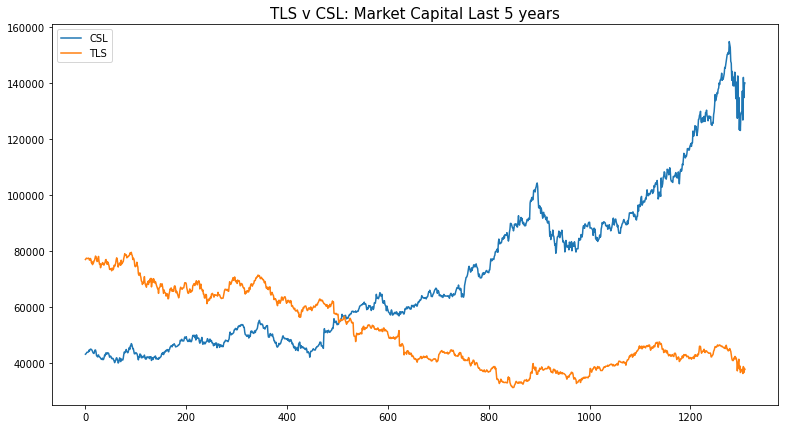

In [13]:
# CUR_MKT_CAP: Line graphs

plt.figure(figsize=(13,7))

plt.title('TLS v CSL: Market Capital Last 5 years', fontsize=15)

plt.plot(CSL_data['CUR_MKT_CAP'])
plt.plot(TLS_data['CUR_MKT_CAP'])
plt.legend(['CSL','TLS'],loc='best', fontsize=10)

plt.show()

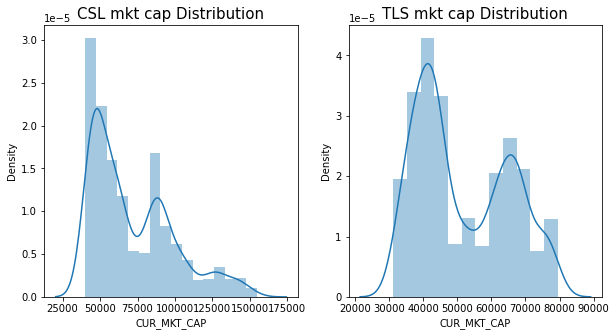

In [14]:
# CUR_MKT_CAP: Density distribution 

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.distplot(CSL_data['CUR_MKT_CAP'])
plt.title('CSL mkt cap Distribution', fontsize=15)

plt.subplot(1,2,2)
sns.distplot(TLS_data['CUR_MKT_CAP'])
plt.title('TLS mkt cap Distribution', fontsize=15)

plt.show()

#### Feature Engineering

The project experiments with CLS Stock features for Feature engineering and Modeling purposes

Features and Attributes

In [15]:
# Setting Features. Selecting CLS stock CLS 
X = CSL_data
y = stocks['CSL.PX']

# Dims
print(X.shape)
print(y.shape)

(1309, 5)
(1309,)


Missing Values

In [16]:
# Missing data
X.isnull().sum().sort_values(ascending=False).head()

DAY_TO_DAY_TOT_RETURN_GROSS_DVDS    0
PX_LAST                             0
EQY_WEIGHTED_AVG_PX                 0
PX_VOLUME                           0
CUR_MKT_CAP                         0
dtype: int64

Outlier detection

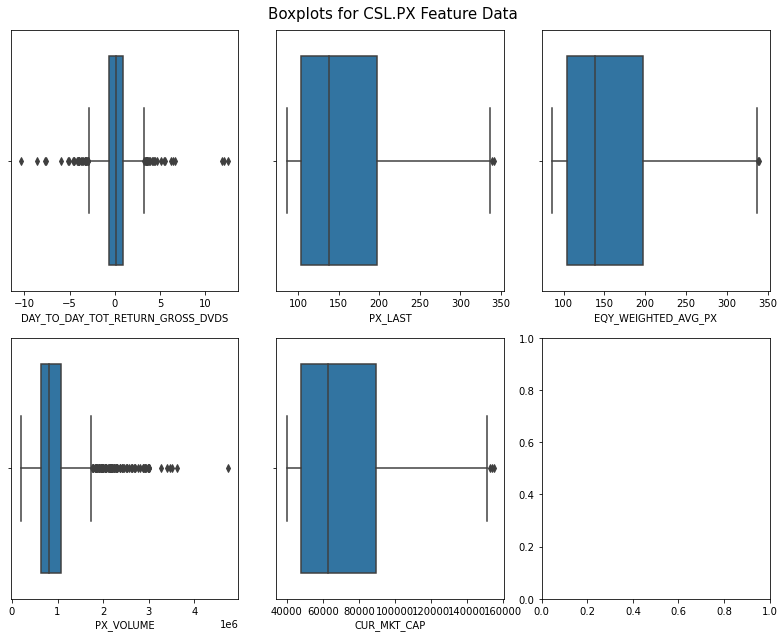

In [17]:
# Boxplots for outlier detection

fig, axs = plt.subplots(nrows=2,ncols=3, figsize=(11,9))

fig.suptitle('Boxplots for CSL.PX Feature Data', fontsize=15)

sns.boxplot(X['DAY_TO_DAY_TOT_RETURN_GROSS_DVDS'], ax=axs[0, 0], )
sns.boxplot(X['PX_LAST'], ax=axs[0, 1])
sns.boxplot(X['EQY_WEIGHTED_AVG_PX'], ax=axs[0, 2])
sns.boxplot(X['PX_VOLUME'], ax=axs[1, 0])
sns.boxplot(X['CUR_MKT_CAP'], ax=axs[1, 1])

fig.tight_layout()

plt.show()

In [18]:
# Tukey IQR for outlier detection

def outliers(x):
    
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1 
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])

    return outlier_indices, outlier_values


In [19]:
# Find outliers
outliers_idx = []

for i in X.columns:
    outlier_indices, outlier_values = outliers(X[i])
    outliers_idx.append(outlier_indices) 
    
outliers_idx = np.array(outliers_idx)
outliers_idx = np.unique(outliers_idx)
outliers_idx = list(outliers_idx)

from itertools import chain
outliers_idx = list(chain.from_iterable(outliers_idx))

In [20]:
# Remove outliers
df = pd.concat([X, y], axis=1)
df = df.drop(index=(outliers_idx))

X = df.drop(columns=['CSL.PX'])
y = df['CSL.PX']

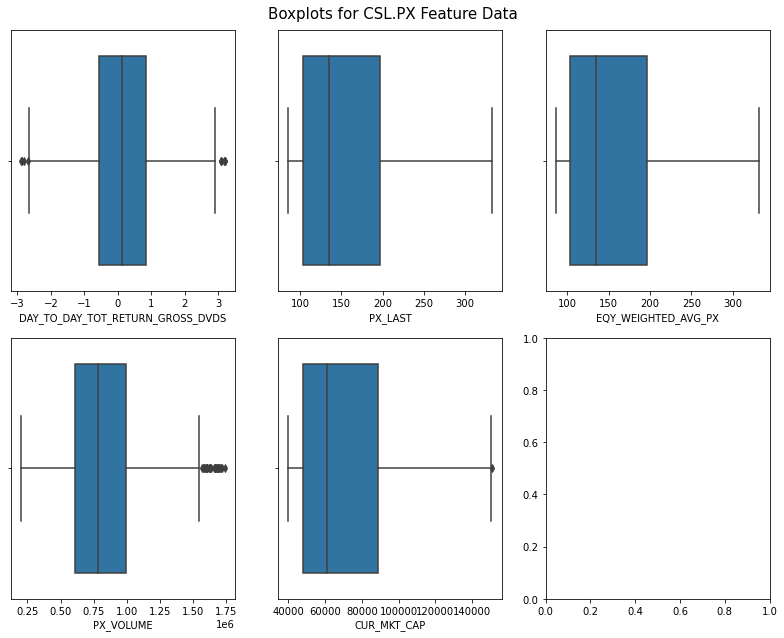

In [21]:
# plots to confirm outliers have been removed
fig, axs = plt.subplots(nrows=2,ncols=3, figsize=(11,9))

fig.suptitle('Boxplots for CSL.PX Feature Data', fontsize=15)

sns.boxplot(X['DAY_TO_DAY_TOT_RETURN_GROSS_DVDS'], ax=axs[0, 0], )
sns.boxplot(X['PX_LAST'], ax=axs[0, 1])
sns.boxplot(X['EQY_WEIGHTED_AVG_PX'], ax=axs[0, 2])
sns.boxplot(X['PX_VOLUME'], ax=axs[1, 0])
sns.boxplot(X['CUR_MKT_CAP'], ax=axs[1, 1])

fig.tight_layout()

plt.show()

.....

In [22]:
# Find outliers for a second time
outliers_idx = []

for i in X.columns:
    outlier_indices, outlier_values = outliers(X[i])
    outliers_idx.append(outlier_indices) 
    
outliers_idx = np.array(outliers_idx)
outliers_idx = np.unique(outliers_idx)
outliers_idx = list(outliers_idx)

outliers_idx = list(chain.from_iterable(outliers_idx))

In [23]:
# Remove outliers
df = pd.concat([X, y], axis=1)
df = df.drop(index=(outliers_idx))

X = df.drop(columns=['CSL.PX'])
y = df['CSL.PX']

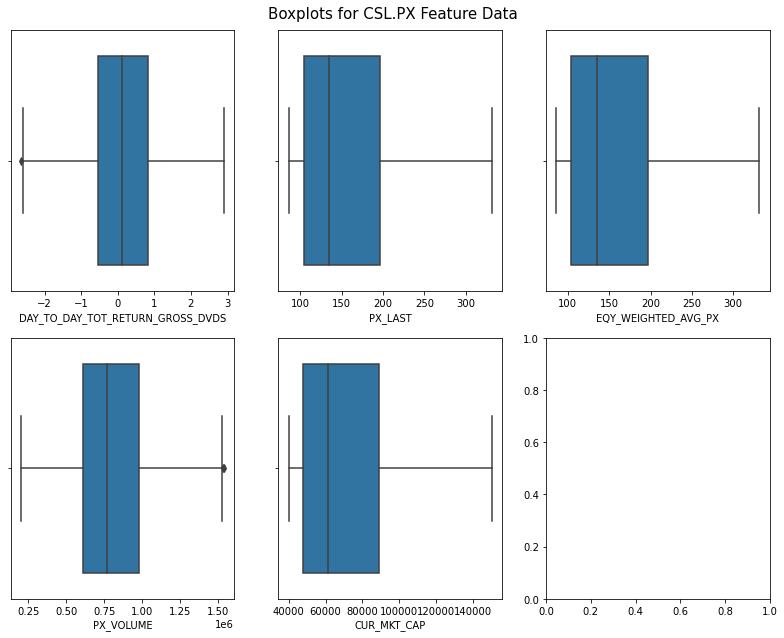

In [24]:
# plots to confirm outliers have been completely removed
fig, axs = plt.subplots(nrows=2,ncols=3, figsize=(11,9))

fig.suptitle('Boxplots for CSL.PX Feature Data', fontsize=15)

sns.boxplot(X['DAY_TO_DAY_TOT_RETURN_GROSS_DVDS'], ax=axs[0, 0], )
sns.boxplot(X['PX_LAST'], ax=axs[0, 1])
sns.boxplot(X['EQY_WEIGHTED_AVG_PX'], ax=axs[0, 2])
sns.boxplot(X['PX_VOLUME'], ax=axs[1, 0])
sns.boxplot(X['CUR_MKT_CAP'], ax=axs[1, 1])

fig.tight_layout()

plt.show()

In [25]:
# Dims
print(X.shape)
print(y.shape)

(1141, 5)
(1141,)


...

Feature Scaling (Standardization)

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X, y)


Two-way Interactions

In [27]:
x = pd.DataFrame(data=X, columns=column_names)

# Polynomial Features: create two-way interactions for features
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

def interactions(data):
    
    # Get feature names
    combos = list(combinations(list(data.columns), 2))
    colnames = list(data.columns) + ['_'.join(x) for x in combos]
    
    # Find interactions
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    data = poly.fit_transform(data)
    data = pd.DataFrame(data)
    data.columns = colnames
    
    # Remove interaction terms with 0 values            
    noint_indicies = [i for i, x in enumerate(list((df == 0).all())) if x]
    data = data.drop(data.columns[noint_indicies], axis=1)
    
    return data


In [28]:
# Add two-way feature ineteractions
X = interactions(x)
X.shape

(1141, 15)

Split Data

In [29]:
# Features and Attributes

X = X.values
y = y.values

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70)


#### Model Design and Implementation: Stock Prediction

Model

In [31]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X_train, y_train)
    

LinearRegression()

Performance

In [32]:
# Predictions
y_pred = model.predict(X_test)

In [33]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('------------------------------------------------------------------------')
print('Root Mean Square Error: ',np.sqrt(mean_squared_error(y_test, y_pred)))
print('------------------------------------------------------------------------')
print('R2 Score:               ',r2_score(y_test, y_pred))
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Root Mean Square Error:  4.8807445572798493e-14
------------------------------------------------------------------------
R2 Score:                1.0
------------------------------------------------------------------------


#### Model Design and Implementation: Stock portfolio optimization

Generic Algorithm for Stock Portfolio Optimization

In [34]:
# Initializations
p_weights = []
p_returns = []
p_risks = []
s_ratios = []

n_portfolios = 5

r_free = 0

for p in range(n_portfolios):
    
    # random weights
    weights = np.round(np.random.random_sample(len(tickers)),2)
    weights = weights /  np.sum(weights)   
    p_weights.append(weights)

    # returns (annual)
    a_return = np.sum(stocks.mean() * weights) * 252
    p_returns.append(a_return)

    # risks (Matrix Covariance, Portfolio Variance, Portfolio Standard Dev)
    m_covariance = stocks.cov() * 252
    p_variance = np.dot(weights.T, np.dot(m_covariance, weights))
    p_risk = np.sqrt(p_variance)
    p_risks.append(p_risk)
    
    # sharpe ratios
    s_ratio = (a_return - r_free) / p_risk
    s_ratios.append(s_ratio)


In [35]:
# Vectorization with Numpy
portfolio_weights = np.round(np.array(p_weights),2)
portfolio_returns = np.round(np.array(p_returns),2)
portfolio_risks = np.round(np.array(p_risks),2)
sharpe_ratios =  np.round(np.array(s_ratios),2)        

In [36]:
# Dataframe
portfolio_ = [portfolio_returns,portfolio_risks,sharpe_ratios,portfolio_weights]
portfolio_df = pd.DataFrame(portfolio_).T
portfolio_df.columns = ['Return (Annual)','Risk','Sharpe Ratio','Weights']
portfolio_df.head()

,Return (Annual),Risk,Sharpe Ratio,Weights
0,12019.85,129.77,92.63,"[0.03, 0.11, 0.04, 0.24, 0.07, 0.08, 0.16, 0.1..."
1,14773.18,261.06,56.59,"[0.11, 0.21, 0.14, 0.06, 0.18, 0.03, 0.09, 0.0..."
2,13752.18,239.57,57.4,"[0.09, 0.2, 0.08, 0.07, 0.2, 0.02, 0.02, 0.02,..."
3,11237.27,149.87,74.98,"[0.13, 0.1, 0.09, 0.11, 0.11, 0.1, 0.1, 0.06, ..."
4,12688.31,191.01,66.43,"[0.12, 0.17, 0.03, 0.16, 0.11, 0.0, 0.18, 0.03..."


In [37]:
# Portfolio Optimization

minimum_risk = portfolio_df.iloc[portfolio_df['Risk'].astype(float).idxmin()]
highest_return = portfolio_df.iloc[portfolio_df['Return (Annual)'].astype(float).idxmax()]
highest_sharpe_ratio = portfolio_df.iloc[portfolio_df['Sharpe Ratio'].astype(float).idxmax()]

print('=================================Tickers================================')
print(tickers)
print('========================================================================')
print('Lowest Risk Portfolio Allocation')
print(minimum_risk)
print('------------------------------------------------------------------------')
print('Highest Return Portfolio Allocation')
print(highest_return)
print('------------------------------------------------------------------------')
print('Highest Sharpe Ratio Portfolio Allocation')
print(highest_sharpe_ratio)
print('------------------------------------------------------------------------')



=================================Tickers================================
['BHP', 'CSL', 'RIO', 'CBA', 'WOW', 'WES', 'TLS', 'AMC', 'BXB', 'FPH']
Lowest Risk Portfolio Allocation
Return (Annual)                                             12019.85
Risk                                                          129.77
Sharpe Ratio                                                   92.63
Weights            [0.03, 0.11, 0.04, 0.24, 0.07, 0.08, 0.16, 0.1...
Name: 0, dtype: object
------------------------------------------------------------------------
Highest Return Portfolio Allocation
Return (Annual)                                             14773.18
Risk                                                          261.06
Sharpe Ratio                                                   56.59
Weights            [0.11, 0.21, 0.14, 0.06, 0.18, 0.03, 0.09, 0.0...
Name: 1, dtype: object
------------------------------------------------------------------------
Highest Sharpe Ratio Portfolio Allocation
R

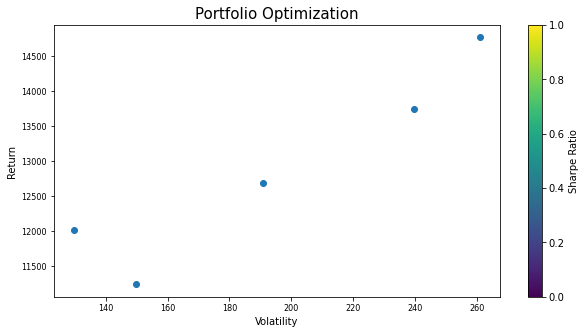

In [38]:
# Visualization

plt.figure(figsize=(10,5))

plt.scatter(portfolio_risks, portfolio_returns)

plt.title('Portfolio Optimization', fontsize=15)
plt.xlabel('Volatility', fontsize=10)
plt.ylabel('Return', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.colorbar(label='Sharpe Ratio')


plt.show()